# Домашняя работа №3

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import chi2_contingency

## Задание 1

есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   
Необходимо прочитать его и представить в виде df 

In [2]:
df = pd.read_csv('shopping_trends.csv')

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


## Задание 2.1

На основании данных из задания 1 необходимо составить максимальное(миним 5) кол-во гипотез о корреляциях между отдельными столбцами и проверить их (аналогично воршопу). При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покапают в основном осенью")


### Гипотеза 1. Покупатели старше 50 лет платят в основном наличными

<Axes: ylabel='Payment Method Test'>

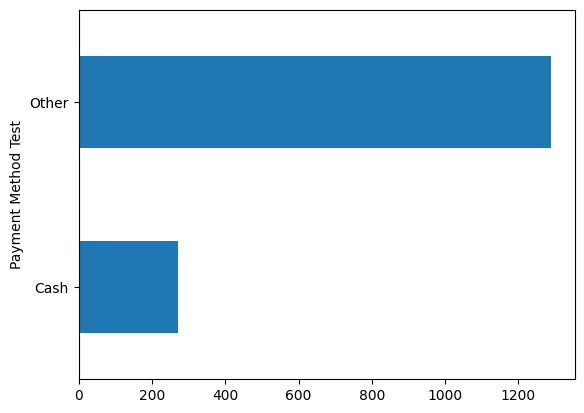

In [6]:
df['Payment Method Test'] = np.where(~df['Payment Method'].str.contains('Cash'), 'Other', 'Cash') # Разделим методы оплаты на наличные и другие
df[df['Age'] >= 50]['Payment Method Test'].value_counts().sort_values().plot(kind='barh')

**Вывод**: Явно видно, что покупатели старше 50 предпочитают другие методы оплаты

### Гипотеза 2. Средняя цена покупки мужчины и женщины одинаковы

<Axes: xlabel='Gender'>

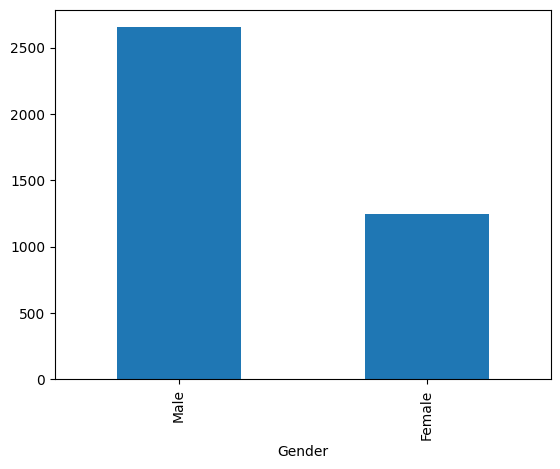

In [7]:
df['Gender'].value_counts().plot(kind='bar') # Распределение полов

In [8]:
df_gend_eql = pd.concat([df[df['Gender'] == 'Male'].sample(1000), df[df['Gender'] == 'Female'].sample(1000)]) # Создадим выборки сбалансированные по классам

<Axes: xlabel='Purchase Amount (USD)', ylabel='Count'>

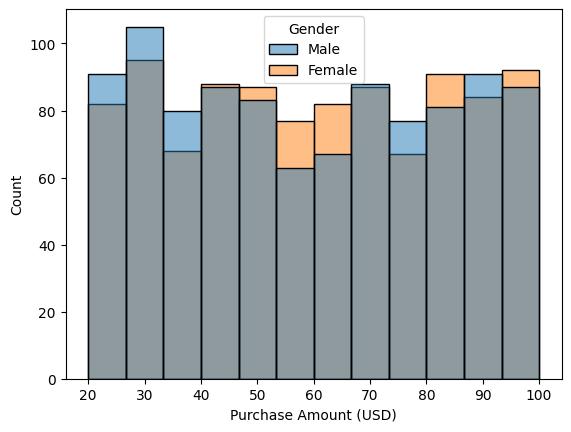

In [9]:
sns.histplot(data=df_gend_eql, x='Purchase Amount (USD)', hue='Gender')

In [10]:
df_gend_eql.groupby('Gender')['Purchase Amount (USD)'].mean()

Gender
Female    60.213
Male      59.276
Name: Purchase Amount (USD), dtype: float64

**Вывод:** Из графика видно, что траты приблизительно одинаковы, а также средняя цена покупки одинакова

### Гипотеза 3. Женщины моложе 30 чаще покупают аксессуары чем женщины старше 30

In [11]:
df['Age_cat'] = pd.cut(df['Age'], bins=[0, 18, 30, 55, 70])

In [12]:
df[df['Gender'] == 'Female']['Age_cat'].value_counts() # Распределение женщин по возрастным группам

Age_cat
(30, 55]    609
(55, 70]    344
(18, 30]    275
(0, 18]      20
Name: count, dtype: int64

In [13]:
grouped = df[df['Gender'] == 'Female'].groupby(['Age_cat', 'Category'])['Customer ID'].count().unstack()
grouped['Total'] = grouped.sum(axis=1)
grouped['Relative Frequency'] = grouped['Accessories'] / grouped['Total']
grouped

/var/folders/ht/t8s67j9j06z1bc3m0sqftfy40000gp/T/ipykernel_22747/1010625294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df[df['Gender'] == 'Female'].groupby(['Age_cat', 'Category'])['Customer ID'].count().unstack()


Category,Accessories,Clothing,Footwear,Outerwear,Total,Relative Frequency
Age_cat,,,,,,
"(0, 18]",9,8,1,2,20,0.450000
"(18, 30]",82,125,45,23,275,0.298182
"(30, 55]",187,279,97,46,609,0.307061
"(55, 70]",114,144,56,30,344,0.331395


**Вывод:** Относительная частота покупки для возрастных категорий до и после 30 приблизительно равны

### Гипотеза 4. Покупатели до 30 лет чаще пользуются подпиской

In [14]:
grouped = df.groupby(['Age_cat', 'Subscription Status'])['Customer ID'].count().unstack()
grouped['Total'] = grouped.sum(axis=1)
grouped['Relative Frequency Yes'] = grouped['Yes'] / grouped['Total']
grouped

/var/folders/ht/t8s67j9j06z1bc3m0sqftfy40000gp/T/ipykernel_22747/1263128986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Age_cat', 'Subscription Status'])['Customer ID'].count().unstack()


Subscription Status,No,Yes,Total,Relative Frequency Yes
Age_cat,,,,
"(0, 18]",55,14,69,0.202899
"(18, 30]",645,235,880,0.267045
"(30, 55]",1328,518,1846,0.280607
"(55, 70]",819,286,1105,0.258824


**Вывод:** Покупатели до 30 лет реже пользуются подпиской

### Гипотеза 5. Мужчины старше 50 лет покупают в основном размер L

<Axes: ylabel='Size'>

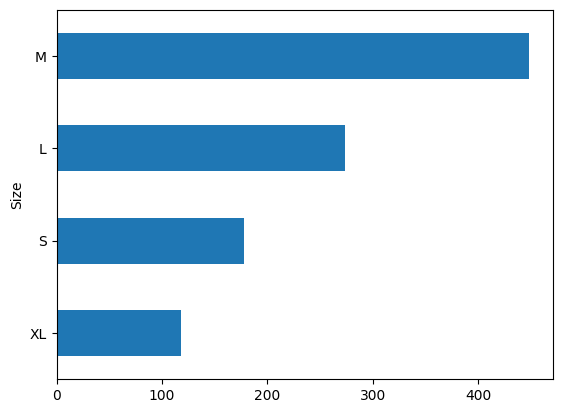

In [15]:
df.query("Age > 50 and Gender == 'Male'")['Size'].value_counts().sort_values().plot(kind='barh')

**Вывод:** Мужчины старше 50 лет покупают в основном размер M

## Задание 2.2

Помимо гипотез, давайте найдем самый популярный товар, построим распределение покупателей по полу, определим какой пол(и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары. Определим есть ли зависимость между цветом одежды и сезоном. Так же посчитаем наш сезонный mau (уникальных пользователей за сезон) и его динамику. Так же давайте найдем самую популярную букву в названии одежды. 

In [16]:
df['Item Purchased'].value_counts().head(5)

Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64

Самыми популярными товарами являются **Blouse**, **Jewelery**, **Pants**

Распределение покупателей по полу:

Text(0.5, 1.0, 'Распределение покупателей по полу')

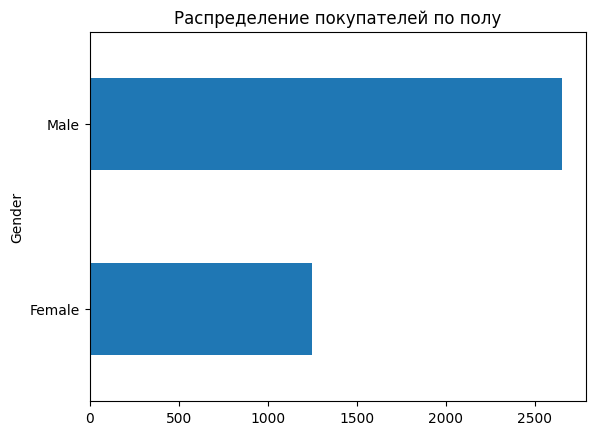

In [17]:
df['Gender'].value_counts().sort_values().plot(kind='barh')
plt.title('Распределение покупателей по полу')

Распределение покупателей по возрастной группе:

<Axes: xlabel='Age_cat'>

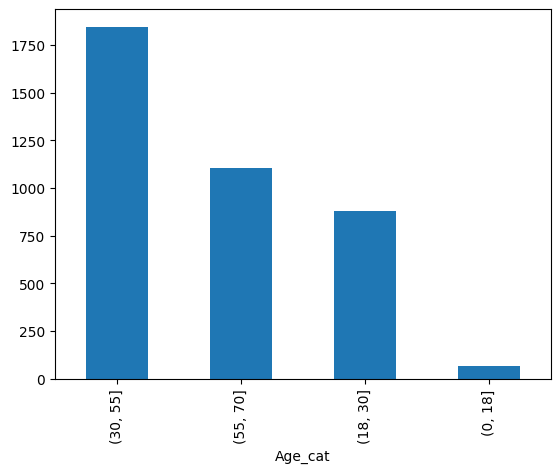

In [18]:
df['Age_cat'].value_counts().plot(kind='bar')

In [19]:
df.groupby('Item Purchased')['Purchase Amount (USD)'].mean().sort_values(ascending=False).head(5) # Самые дорогие товары (в среднем)

Item Purchased
T-shirt    62.911565
Boots      62.625000
Dress      62.168675
Shoes      61.600000
Shirt      61.136095
Name: Purchase Amount (USD), dtype: float64

Рассмотрим зависимость между цветом одежды и сезоном:

Text(0.5, 1.0, 'Зависимость между цветом одежды и сезоном')

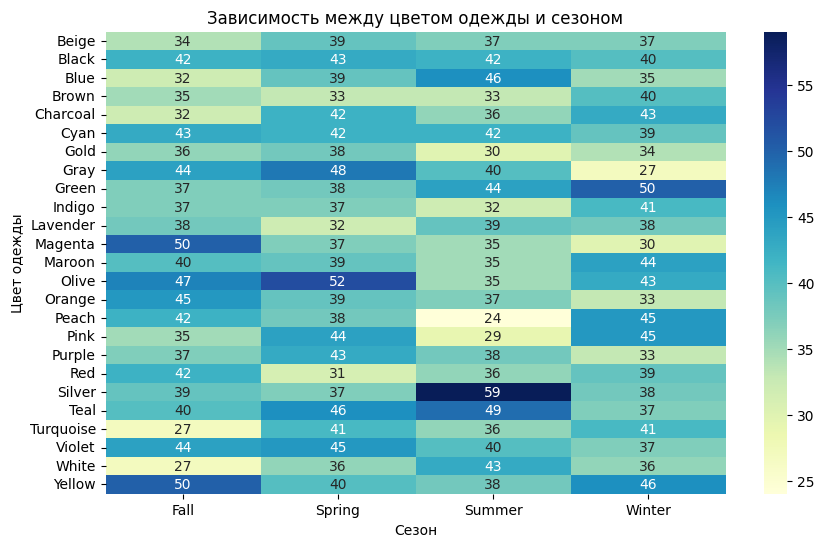

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['Color'], df['Season']), annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Сезон')
plt.ylabel('Цвет одежды')
plt.title('Зависимость между цветом одежды и сезоном')

Расчет сезонного MAU:

In [21]:
df.groupby('Season')['Customer ID'].count()

Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64

Динамика MAU:

<Axes: xlabel='Season'>

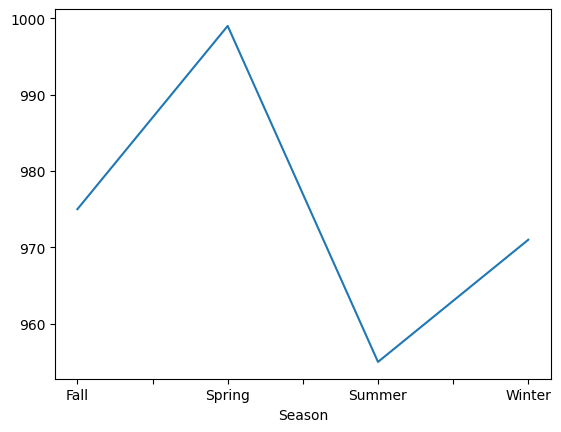

In [22]:
df.groupby('Season')['Customer ID'].count().plot()

Рассчитаем самую популярную букву в названии товаров:

In [23]:
letter_counts = Counter(''.join(df['Item Purchased'].str.lower().unique()))
letter_counts.most_common(1)[0]

('s', 26)

## Задание 3

У нас есть данные о потреблении алкоголя о потреблнеии Алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Давайте представим эти данные в виде df, где же люди пьют больше вина, пива и других спиртных напитков.

In [24]:
df = pd.read_csv('drinks.csv')

In [25]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


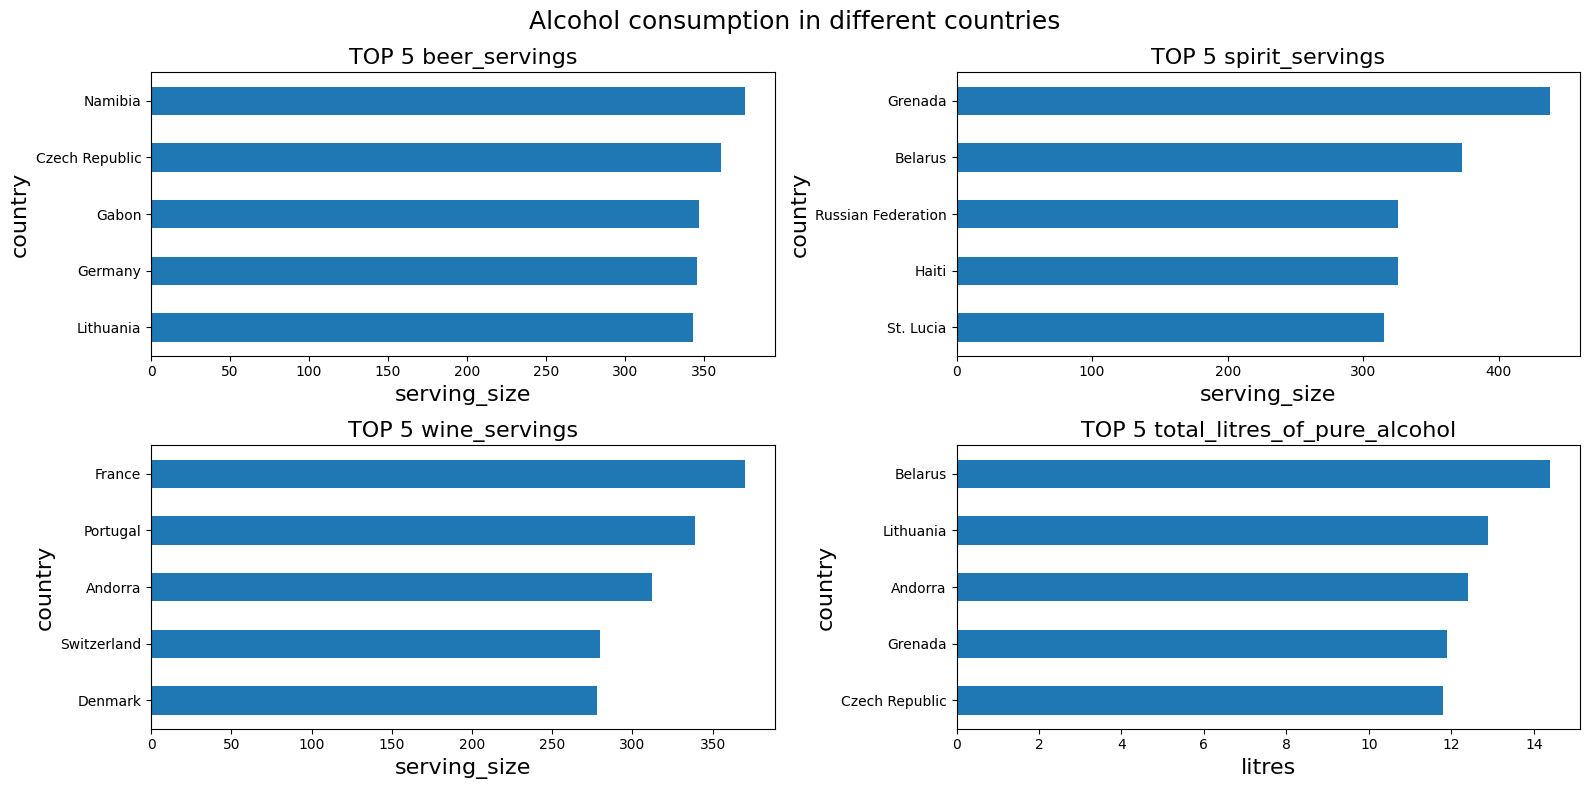

In [26]:
plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Alcohol consumption in different countries', fontsize=18)

for i, col in enumerate(df.drop('country', axis=1).columns):
    ax = ax = plt.subplot(2, 2, i + 1)
    df.groupby('country')[col].sum().sort_values().tail(5).plot(kind='barh')
    ax.set_title(f'TOP 5 {col}', fontsize=16)
    ax.set_ylabel('country', fontsize=16)
    ax.set_xlabel('litres', fontsize=16) if col == 'total_litres_of_pure_alcohol' else ax.set_xlabel('serving_size', fontsize=16)

plt.tight_layout()
plt.show()

## Задание 4

У нас есть Полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Давайте представим эти данные в виде df и определим:

- число проклятий, летальных исходов и их отношение по фильмам 

- частота употребления конкретных прокрятий 

- распределение времени между проклятиями 

In [27]:
df = pd.read_csv('tarantino.csv')

In [28]:
df.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [29]:
grouped = df.groupby('movie')['type'].value_counts().unstack()
grouped['word/death'] = grouped['word'] / grouped['death']
grouped

type,death,word,word/death
movie,,,
Django Unchained,47,262,5.574468
Inglorious Basterds,48,58,1.208333
Jackie Brown,4,368,92.000000
Kill Bill: Vol. 1,63,57,0.904762
Kill Bill: Vol. 2,11,69,6.272727
Pulp Fiction,7,469,67.000000
Reservoir Dogs,10,421,42.100000


<Axes: ylabel='word'>

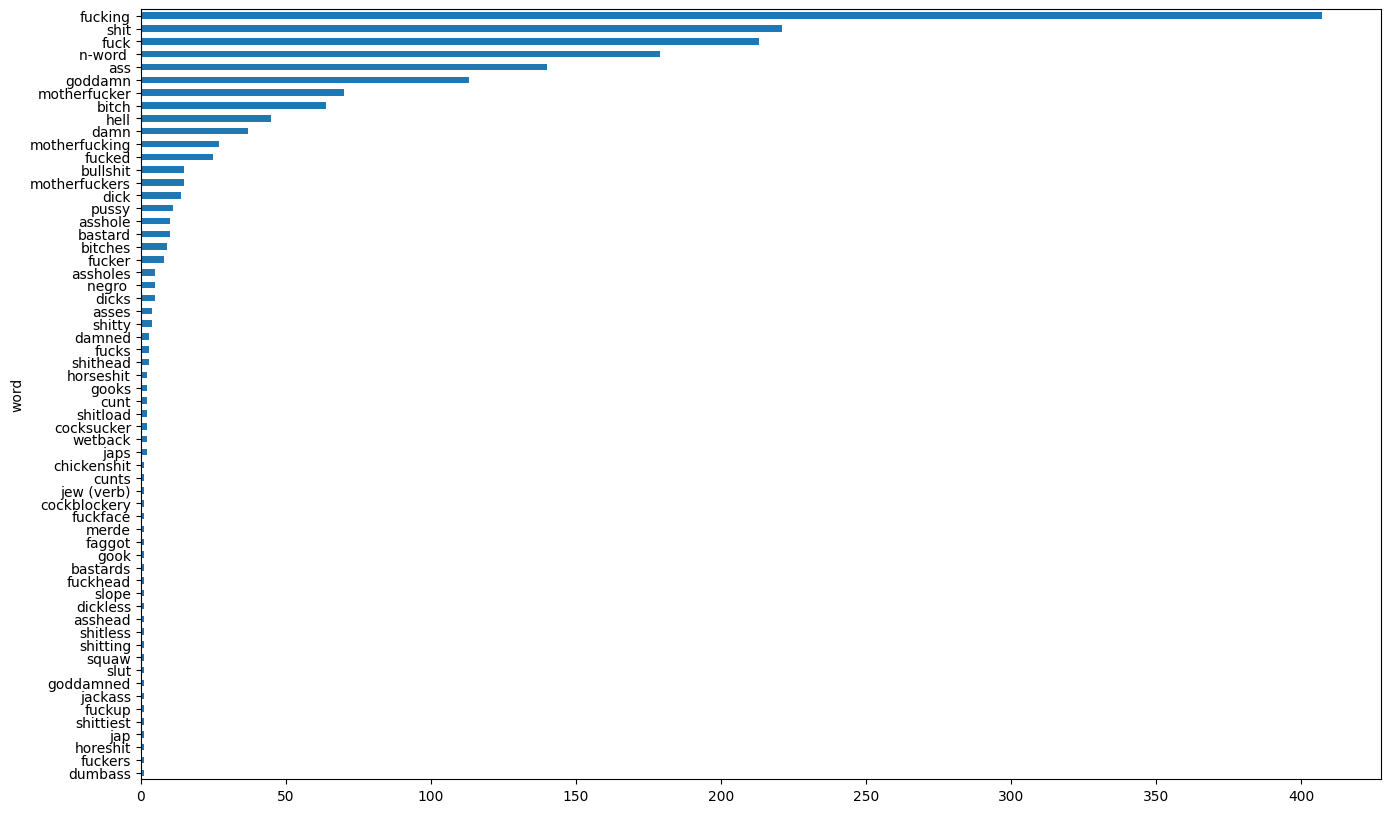

In [30]:
plt.figure(figsize=(16, 10))
df['word'].value_counts().sort_values().plot(kind='barh')

(0.0, 20.0)

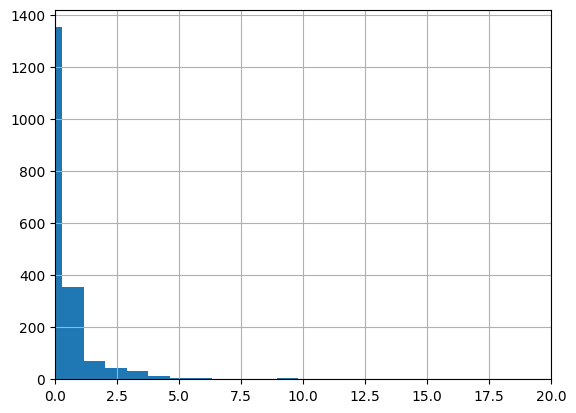

In [31]:
df['minutes_in'].diff().dropna().hist(bins=200)
plt.xlim([0, 20])